In [74]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import rose

# Pandas Rose
[Pandas Rose on Github](https://github.com/blaylockbk/pandas-rose)

***

To use:
1. Define Lat/Lon of Interest
2. Run the remaining code blocks
3. Voila - plots are saved as PNG files

In [81]:
LAT = 30
LON = -65

In [17]:
# URL pattern for u-wind data
url_uwnd = 'http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis/surface/uwnd.sig995.{year}.nc'
url_vwnd = 'http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis/surface/vwnd.sig995.{year}.nc'

# List to store the URLs for each year
urls_uwnd = [url_uwnd.format(year=year) for year in range(2000, 2021)]
urls_vwnd = [url_vwnd.format(year=year) for year in range(2000, 2021)]

try:
    ds_u = xr.open_mfdataset(urls_uwnd)
    ds_v = xr.open_mfdataset(urls_vwnd)
    
    print("Opened wind data for years 2000 to 2020 as a single dataset")
except Exception as e:
    print(f"Failed to open wind data: {e}")

Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1
Note:Caching=1


Opened u-wind data for years 2000 to 2020 as a single dataset


In [20]:
merge = xr.merge([ds_u, ds_v])
merge

<xarray.Dataset>
Dimensions:  (lon: 144, lat: 73, time: 30684)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * time     (time) datetime64[ns] 2000-01-01 ... 2020-12-31T18:00:00
Data variables:
    uwnd     (time, lat, lon) float32 dask.array<chunksize=(1464, 73, 144), meta=np.ndarray>
    vwnd     (time, lat, lon) float32 dask.array<chunksize=(1464, 73, 144), meta=np.ndarray>
Attributes:
    Conventions:                     COARDS
    title:                           4x daily NMC reanalysis (2000)
    description:                     Data is from NMC initialized reanalysis\...
    platform:                        Model
    history:                         created 00/01/30 by Hoop (netCDF2.3)\nCo...
    dataset_title:                   NCEP-NCAR Reanalysis 1
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    DODS_EXTRA.Unlimited_Dimension:  time

In [83]:
single_location = merge.sel(lat=LAT, lon=360+LON, method='nearest')
single_location

<xarray.Dataset>
Dimensions:  (time: 30684)
Coordinates:
    lon      float32 295.0
    lat      float32 30.0
  * time     (time) datetime64[ns] 2000-01-01 ... 2020-12-31T18:00:00
Data variables:
    uwnd     (time) float32 dask.array<chunksize=(1464,), meta=np.ndarray>
    vwnd     (time) float32 dask.array<chunksize=(1464,), meta=np.ndarray>
Attributes:
    Conventions:                     COARDS
    title:                           4x daily NMC reanalysis (2000)
    description:                     Data is from NMC initialized reanalysis\...
    platform:                        Model
    history:                         created 00/01/30 by Hoop (netCDF2.3)\nCo...
    dataset_title:                   NCEP-NCAR Reanalysis 1
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    DODS_EXTRA.Unlimited_Dimension:  time

In [27]:
df = single_location.to_dataframe()
df

,lon,lat,uwnd,vwnd
time,,,,
2000-01-01 00:00:00,295.0,30.0,5.000000,-1.399994
2000-01-01 06:00:00,295.0,30.0,5.199997,-4.399994
2000-01-01 12:00:00,295.0,30.0,1.699997,-4.599991
2000-01-01 18:00:00,295.0,30.0,-1.000000,-2.899994
2000-01-02 00:00:00,295.0,30.0,-3.699997,-3.300003
...,...,...,...,...
2020-12-30 18:00:00,295.0,30.0,-6.399997,-8.300000
2020-12-31 00:00:00,295.0,30.0,-7.999999,-5.899999
2020-12-31 06:00:00,295.0,30.0,-7.000000,-2.699997


In [70]:
df.loc[:, 'wspd'] = df.apply(lambda row: np.round(np.sqrt(row['uwnd']**2 + row['vwnd']**2) * 1.94384, decimals=2), axis=1)
df.loc[:, 'wdir'] = df.apply(lambda row: np.round((np.arctan2(row['uwnd'], row['vwnd']) * 180.0 / np.pi) + 180.0, 2), axis=1)

In [71]:
df

,lon,lat,uwnd,vwnd,wspd,wdir
time,,,,,,
2000-01-01 00:00:00,295.0,30.0,5.000000,-1.399994,10.09,285.64
2000-01-01 06:00:00,295.0,30.0,5.199997,-4.399994,13.24,310.24
2000-01-01 12:00:00,295.0,30.0,1.699997,-4.599991,9.53,339.72
2000-01-01 18:00:00,295.0,30.0,-1.000000,-2.899994,5.96,19.03
2000-01-02 00:00:00,295.0,30.0,-3.699997,-3.300003,9.64,48.27
...,...,...,...,...,...,...
2020-12-30 18:00:00,295.0,30.0,-6.399997,-8.300000,20.37,37.64
2020-12-31 00:00:00,295.0,30.0,-7.999999,-5.899999,19.32,53.59
2020-12-31 06:00:00,295.0,30.0,-7.000000,-2.699997,14.58,68.91


# Wind Rose Plot

/Users/rhawthorne/miniconda3/envs/metpy/lib/python3.11/site-packages/rose/__init__.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["dir_bin", "var_bin"])


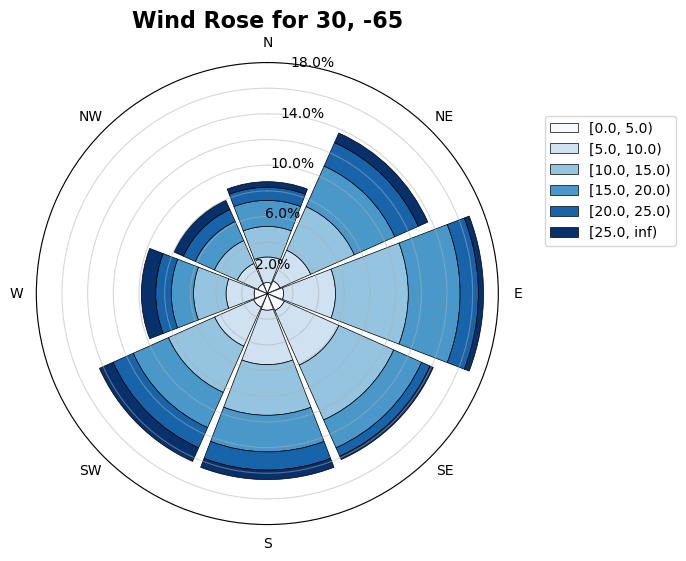

In [85]:
df.rose.plot(
    var_column="wspd",
    dir_column="wdir",
    sectors=8,
    bins=range(0,30,5),
    normed=True,
    colors='Blues')

plt.title(f"Wind Rose for {LAT}, {LON}", fontsize=16, fontweight='bold')
plt.show()

# Wind Direction Bins Bar Plot

/Users/rhawthorne/miniconda3/envs/metpy/lib/python3.11/site-packages/rose/__init__.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["dir_bin", "var_bin"])


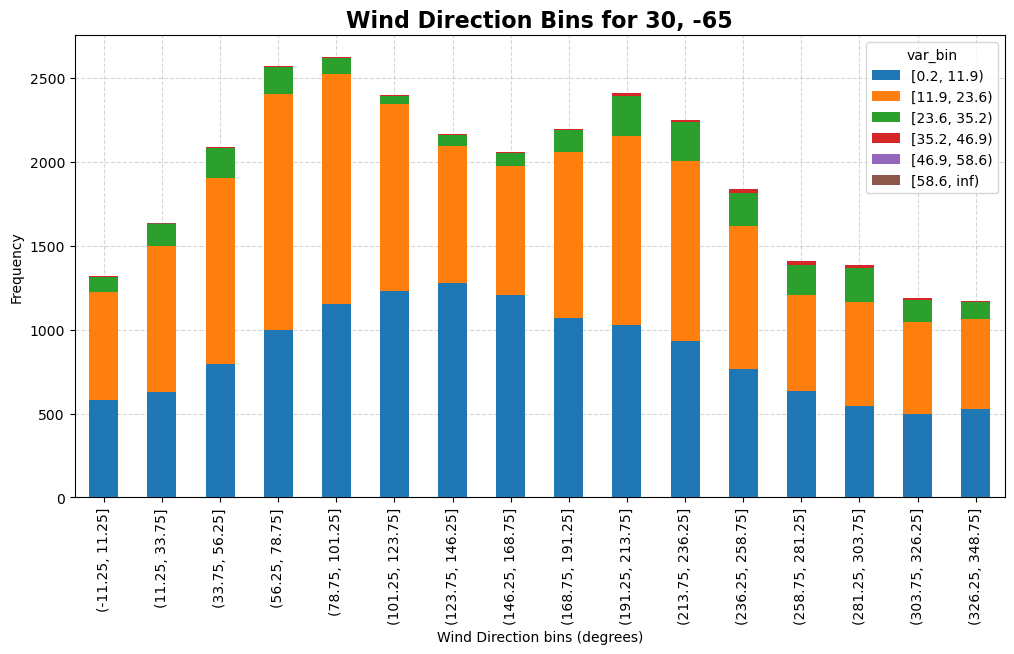

In [89]:
df.rose.bar(var_column="wspd", dir_column="wdir")
plt.title(f"Wind Direction Bins for {LAT}, {LON}", fontsize=16, fontweight='bold')
plt.show()

# Dataframe of Binned Values

In [88]:
df.rose.table(sectors=8, var_column="wspd", dir_column="wdir",)

/Users/rhawthorne/miniconda3/envs/metpy/lib/python3.11/site-packages/rose/__init__.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["dir_bin", "var_bin"])


var_bin,"[0.2, 11.9)","[11.9, 23.6)","[23.6, 35.2)","[35.2, 46.9)","[46.9, 58.6)","[58.6, inf)"
dir_bin,,,,,,
"(-22.5, 22.5]",1148,1318,198,9,0,1
"(22.5, 67.5]",1580,2270,339,11,1,0
"(67.5, 112.5]",2282,2689,186,10,0,0
"(112.5, 157.5]",2527,1692,114,8,3,0
"(157.5, 202.5]",2165,1957,311,15,1,0
"(202.5, 247.5]",1851,2070,437,32,4,0
"(247.5, 292.5]",1293,1285,385,47,1,0
"(292.5, 337.5]",1010,1121,289,19,0,0
